In [124]:
import pandas as pd
import numpy as np

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer

import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD

from xgboost import XGBClassifier

import matplotlib.pyplot as plt
import seaborn as sns

In [125]:
# Import Data

df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [126]:
def titl(temp):
    temp_data = temp['Name'].str.split(',', expand=True)
    temp_data.iloc[:,1]
    temp_data = temp_data.iloc[:,1].str.split('.', expand=True)
    temp_data = temp_data.iloc[:,0]

    count = pd.Series(temp_data).value_counts()

    print(count)

    print(np.unique(temp_data))

    type(temp_data.loc[:])
    return temp_data

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Col               2
 Mlle              2
 Major             2
 Mme               1
 the Countess      1
 Jonkheer          1
 Don               1
 Ms                1
 Lady              1
 Sir               1
 Capt              1
Name: 0, dtype: int64
[' Capt' ' Col' ' Don' ' Dr' ' Jonkheer' ' Lady' ' Major' ' Master'
 ' Miss' ' Mlle' ' Mme' ' Mr' ' Mrs' ' Ms' ' Rev' ' Sir' ' the Countess']


0         Mr
1        Mrs
2       Miss
3        Mrs
4         Mr
       ...  
886      Rev
887     Miss
888     Miss
889       Mr
890       Mr
Name: 0, Length: 891, dtype: object

In [122]:
tkt_raw_data = df['Ticket'].str.split(' ', expand=True)

second = tkt_raw_data.dropna(subset=[1]).index
tkt_df = tkt_raw_data
tkt_df.iloc[second,0] = tkt_df.iloc[second,1] 
third = tkt_raw_data.dropna(subset=[2]).index
tkt_df.iloc[third,0] = tkt_df.iloc[third,2]
tkt_df = tkt_df.iloc[:,0]
a = tkt_df[tkt_df == 'LINE'].index
a
#tkt_df.to_csv("temp.csv", index=False)

Int64Index([179, 271, 302, 597], dtype='int64')

In [123]:
# Data Preprocessing
def data_processing(DataFrame):
    
    le = LabelEncoder()
    
    temp_data = DataFrame['Name'].str.split(', ', expand=True)
    temp_data.iloc[:,1]
    temp_data = temp_data.iloc[:,1].str.split('.', expand=True)
    temp_data = temp_data.iloc[:,0]
    DataFrame['Title'] = temp_data
    
    encoder = OrdinalEncoder()      # define ordinal encoding
    DataFrame['Pclass'] = encoder.fit_transform(DataFrame['Pclass'].to_numpy().reshape(-1, 1))
    
    #print(result)
    
    tkt_temp = DataFrame['Ticket'].str.split(' ', expand=True)
    second = tkt_temp.dropna(subset=[1]).index
    tkt_temp.iloc[second,0] = tkt_temp.iloc[second,1] 
    third = tkt_temp.dropna(subset=[2]).index
    tkt_temp.iloc[third,0] = tkt_temp.iloc[third,2]
    tkt_temp = tkt_temp.iloc[:,0]
    del_index = tkt_df[tkt_df == 'LINE'].index
    DataFrame['TktNum'] = tkt_temp
    DataFrame.loc[DataFrame.TktNum == 'LINE', 'TktNum'] = np.nan
    DataFrame.dropna(subset=['TktNum'], inplace = True)
    DataFrame['TktNum'] = DataFrame['TktNum'].astype(int)
    
    DataFrame.drop(['Cabin', 'PassengerId', 'Ticket', 'Name'], axis=1, inplace=True)  # dropping unnecessary columns 

    DataFrame.dropna(subset=['Embarked'], inplace = True) # delete this later
    #DataFrame.dropna(subset=['Age'], inplace = True)

    DataFrame['Title'] = DataFrame.Title.map({'Mr':1, 'Mrs':2, 'Miss':3, 'Master':4, 'Dr':5, 'Rev':5, 'Col':5, 'Major':5, 'Mlle':3, 'Jonkheer':5, 'Mme':2, 'Lady':5, 'Capt':5, 'Ms':3, 'Don':5, 'Dona':5, 'Sir':5, 'the Countess':5})
    DataFrame['Title'] = le.fit_transform(DataFrame['Title'])

    DataFrame['Sex'] = le.fit_transform(DataFrame['Sex'])
    #DataFrame["Sex"] = np.where(df["Sex"] == "female", 0, 1)
    
    DataFrame['Embarked'] = le.fit_transform(DataFrame['Embarked'])
    #DataFrame.loc[DataFrame.Embarked == 'C', 'Embarked'] = 0
    #DataFrame.loc[DataFrame.Embarked == 'S', 'Embarked'] = 1
    #DataFrame.loc[DataFrame.Embarked == 'Q', 'Embarked'] = 2
        
    return DataFrame

df = data_processing(df)
test_df = data_processing(test_df)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,TktNum
0,0,2.0,1,22.0,1,0,7.2500,2,0,21171
1,1,0.0,0,38.0,1,0,71.2833,0,1,17599
2,1,2.0,0,26.0,0,0,7.9250,2,2,3101282
3,1,0.0,0,35.0,1,0,53.1000,2,1,113803
4,0,2.0,1,35.0,0,0,8.0500,2,0,373450


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 885 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  885 non-null    int64  
 1   Pclass    885 non-null    float64
 2   Sex       885 non-null    int32  
 3   Age       708 non-null    float64
 4   SibSp     885 non-null    int64  
 5   Parch     885 non-null    int64  
 6   Fare      885 non-null    float64
 7   Embarked  885 non-null    int32  
 8   Title     885 non-null    int64  
 9   TktNum    885 non-null    int32  
dtypes: float64(3), int32(3), int64(4)
memory usage: 65.7 KB


In [88]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,TktNum
count,885.000000,885.000000,885.000000,708.000000,885.000000,885.000000,885.000000,885.000000,885.000000,8.850000e+02
mean,0.383051,1.308475,0.647458,29.627359,0.526554,0.384181,32.241751,1.533333,0.796610,2.987459e+05
std,0.486405,0.835298,0.478032,14.507081,1.105634,0.808173,49.762788,0.793260,1.078056,6.582991e+05
min,0.000000,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000e+00
25%,0.000000,1.000000,0.000000,20.000000,0.000000,0.000000,7.925000,1.000000,0.000000,1.487900e+04
50%,0.000000,2.000000,1.000000,28.000000,0.000000,0.000000,14.454200,2.000000,0.000000,1.120590e+05
75%,1.000000,2.000000,1.000000,38.000000,1.000000,0.000000,31.000000,2.000000,2.000000,3.470820e+05
max,1.000000,2.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000,4.000000,3.101317e+06


In [89]:
'''feature = df.loc[:,'Age']
transformation = np.log(feature)
plt.hist(transformation)
'''

"feature = df.loc[:,'Age']\ntransformation = np.log(feature)\nplt.hist(transformation)\n"

In [90]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

X_predict = test_df

print(len(X))
print(len(X_predict))

885
418


In [91]:
train_test_X = pd.concat([X, X_predict], ignore_index=True)
print(len(train_test_X))
#print(train_test_X.columns)
X_index = train_test_X.columns

1303


In [92]:
def detect_outlier(data):
    outliers = []
    
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    
    for i in data:
        z_score = (i - mean) / std
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

In [93]:
outliers_fare = detect_outlier(train_test_X.loc[:,'Fare'])
print(sorted(outliers_fare))

outliers_age = detect_outlier(train_test_X.loc[:,'Age'])
print(outliers_age)

#df['Fare'].mask(df['Fare'] > 247.5 , np.nan , inplace=True)
#df['Age'].mask(df['Age'] > 75 , np.nan , inplace=True)

[211.3375, 211.3375, 211.3375, 211.3375, 211.5, 211.5, 211.5, 211.5, 211.5, 221.7792, 221.7792, 221.7792, 221.7792, 227.525, 227.525, 227.525, 227.525, 227.525, 247.5208, 247.5208, 247.5208, 262.375, 262.375, 262.375, 262.375, 262.375, 262.375, 262.375, 263.0, 263.0, 263.0, 263.0, 263.0, 263.0, 512.3292, 512.3292, 512.3292, 512.3292]
[80.0, 74.0, 76.0]


In [94]:
quantile1, quantile3 = np.percentile(df.iloc[:,6], [25,75])
print(quantile1, quantile3)

# find IQR
iqr_value = quantile3 - quantile1
print(iqr_value)

# Finding Lower and higher bound
lower_bound = quantile1 - (1.5 * iqr_value)
upper_bound = quantile3 + (1.5 * iqr_value)
print(lower_bound, upper_bound)
temp = upper_bound - lower_bound 
analyse = df[df.iloc[:,6] > upper_bound]

analyse.info()

7.925 31.0
23.075
-26.687499999999996 65.6125
<class 'pandas.core.frame.DataFrame'>
Int64Index: 114 entries, 1 to 879
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  114 non-null    int64  
 1   Pclass    114 non-null    float64
 2   Sex       114 non-null    int32  
 3   Age       99 non-null     float64
 4   SibSp     114 non-null    int64  
 5   Parch     114 non-null    int64  
 6   Fare      114 non-null    float64
 7   Embarked  114 non-null    int32  
 8   Title     114 non-null    int64  
 9   TktNum    114 non-null    int32  
dtypes: float64(3), int32(3), int64(4)
memory usage: 8.5 KB


In [95]:
df.isnull().sum()
test_df.isnull().sum()
train_test_X.isnull().sum()

Pclass        0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          1
Embarked      0
Title         0
TktNum        0
dtype: int64

In [96]:
def fill_missing_values(Col_Name,df_name):
    missing_col = [Col_Name]

    #Technique 1: Using mean to impute the missing values
    for i in missing_col:
     df_name.loc[df_name.loc[:,i].isnull(),i] = df_name.loc[:,i].mean()
    
    return 0


imputer = KNNImputer(n_neighbors=1)
train_test_X = imputer.fit_transform(train_test_X)


#fill_missing_values('Age',train_test_X)
#fill_missing_values('Fare',train_test_X)

#fill_missing_values('Fare')
#df.dropna(subset=['Fare'], inplace=True)

#fill_missing_values('Age', df)
#fill_missing_values('Age', test_df)

train_test_X[np.isnan(train_test_X)]

array([], dtype=float64)

In [97]:
standardization = StandardScaler() 
train_test_X = standardization.fit_transform(train_test_X)

#print(pd.DataFrame(train_test_X).describe())

X = train_test_X[:885,:]
X_predict = train_test_X[885:,:]

print(len(X))
print(len(X_predict))

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state=1)   # splitting for training data

X.shape

#X_train = X_train.to_numpy()
#X_test = X_test.to_numpy()

885
418


(885, 9)

In [115]:
pearson_correlation_coef = df.corr()
pearson_correlation_coef

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,TktNum
Survived,1.000000,-0.335705,-0.542402,-0.081042,-0.034711,0.082770,0.255234,-0.169458,0.405460,-0.095778
Pclass,-0.335705,1.000000,0.125344,-0.368364,0.083599,0.018632,-0.547142,0.162869,-0.116168,0.286102
Sex,-0.542402,0.125344,1.000000,0.098609,-0.114968,-0.246358,-0.178196,0.108587,-0.562944,0.076637
Age,-0.081042,-0.368364,0.098609,1.000000,-0.307621,-0.187863,0.094094,-0.033180,-0.264176,-0.106422
SibSp,-0.034711,0.083599,-0.114968,-0.307621,1.000000,0.413945,0.159731,0.070251,0.269325,0.045731
Parch,0.082770,0.018632,-0.246358,-0.187863,0.413945,1.000000,0.216461,0.041760,0.267664,-0.033843
Fare,0.255234,-0.547142,-0.178196,0.094094,0.159731,0.216461,1.000000,-0.224985,0.137719,-0.156484
Embarked,-0.169458,0.162869,0.108587,-0.033180,0.070251,0.041760,-0.224985,1.000000,-0.082013,0.194208
Title,0.405460,-0.116168,-0.562944,-0.264176,0.269325,0.267664,0.137719,-0.082013,1.000000,-0.056434
TktNum,-0.095778,0.286102,0.076637,-0.106422,0.045731,-0.033843,-0.156484,0.194208,-0.056434,1.000000


[0.09507663 0.22212049 0.1534339  0.04813054 0.02905318 0.13648805
 0.03012596 0.10614679 0.17942447]


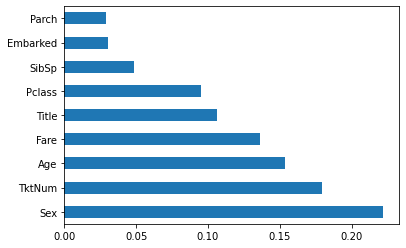

In [99]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
f_imp = pd.Series(model.feature_importances_, index=X_index)
f_imp.nlargest(10).plot(kind='barh')
plt.show()

In [100]:
'''
figure, axis = plt.subplots(1, 2)
axis[0].hist(X[:,2])
#plt.hist(X[:,2])

axis[1].hist(df.loc[:,'Age'])
#plt.hist(df.loc[:,'Age'])

plt.show()
'''

"\nfigure, axis = plt.subplots(1, 2)\naxis[0].hist(X[:,2])\n#plt.hist(X[:,2])\n\naxis[1].hist(df.loc[:,'Age'])\n#plt.hist(df.loc[:,'Age'])\n\nplt.show()\n"

In [101]:
# remove outliers
# fill / impute na values
# encode categorial features - Done
# analyse features correalation
# plot each feature to understand its distribution and then convert the distribution to gausian normal
# apply StandardScaler

In [102]:
model_DT = XGBClassifier()
model_DT.fit(X_train, y_train)

y_test_predict = model_DT.predict(X_test)
acc_DT = sklearn.metrics.accuracy_score(y_test_predict,y_test)
print(acc_DT)

0.8426966292134831


In [103]:
# Logistic Regression / Classification - sklearn
model_classification = LogisticRegression()
model_classification.fit(X_train,y_train)
y_predict_classification = model_classification.predict(X_test)
acc_classification = sklearn.metrics.accuracy_score(y_predict_classification,y_test)
print(acc_classification)

0.6966292134831461


In [104]:
# Random Forest Implementation
model_RFC = RandomForestClassifier()
model_RFC.fit(X_train,y_train)
y_predict_RFC = model_RFC.predict(X_test)
acc_RFC = sklearn.metrics.accuracy_score(y_predict_RFC,y_test)
print(acc_RFC)

0.8314606741573034


In [105]:
# Neural Networks Implementation

model_NN = Sequential([Dense(units = 32, activation='relu', name = 'layer_1', input_dim = 9, kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.0, l2=0.01)),
                       Dense(units = 64, activation='relu', name = 'layer_2', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.0, l2=0.01)),
                       Dense(units = 16, activation='relu', name = 'layer_3', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.0, l2=0.01)),
                       Dense(units = 1, activation='sigmoid', name = 'layer_4'),
                      ])

model_NN.compile(loss=BinaryCrossentropy(),
                 optimizer = Adam(learning_rate = 0.0001),
                metrics=tf.keras.metrics.BinaryAccuracy())

# optimizer = Adam(learning_rate = 0.0001),

model_NN.fit(X,y, epochs=2000, verbose=1)

score = model_NN.evaluate(X_test, y_test, verbose=1)


Epoch 1/2000
28/28 [==============================] - 1s 2ms/step - loss: 1.5108 - binary_accuracy: 0.5424
Epoch 2/2000
28/28 [==============================] - 0s 1ms/step - loss: 1.4793 - binary_accuracy: 0.5853
Epoch 3/2000
28/28 [==============================] - 0s 1ms/step - loss: 1.4500 - binary_accuracy: 0.6282
Epoch 4/2000
28/28 [==============================] - 0s 1ms/step - loss: 1.4226 - binary_accuracy: 0.6768
Epoch 5/2000
28/28 [==============================] - 0s 1ms/step - loss: 1.3961 - binary_accuracy: 0.7028
Epoch 6/2000
28/28 [==============================] - 0s 1ms/step - loss: 1.3701 - binary_accuracy: 0.7266
Epoch 7/2000
28/28 [==============================] - 0s 1ms/step - loss: 1.3451 - binary_accuracy: 0.7446
Epoch 8/2000
28/28 [==============================] - 0s 1ms/step - loss: 1.3207 - binary_accuracy: 0.7582
Epoch 9/2000
28/28 [==============================] - 0s 1ms/step - loss: 1.2968 - binary_accuracy: 0.7650
Epoch 10/2000
28/28 [================

In [106]:
X_predict[np.isnan(X_predict)]

array([], dtype=float64)

In [111]:
X_predict = X_predict
y_predictions = model_DT.predict(X_predict)
#y_predictions[y_predictions>=0.5] = 1
#y_predictions[y_predictions<0.5] = 0
#y_predictions = np.reshape(y_predictions,418)
y_predictions = y_predictions.astype(int)
y_predictions

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [112]:
print(len(y_predictions))
X_predict.shape

418


(418, 9)

In [113]:
temp_df = pd.read_csv("test.csv")
res = pd.Series(y_predictions)
#temp_df = pd.concat([temp_df, res.to_frame()], axis=1)
temp_df['Survived'] = res
temp_df.drop(['Cabin', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Ticket'], axis=1, inplace=True)
temp_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [114]:
temp_df.to_csv("Predictions.csv", index=False)

In [ ]:
np.arange(6,15)
np.arange(15)